# Análise exploratória de dados

In [1]:
import pandas as pd

In [2]:
# importando os dados

data = pd.read_csv('../data/raw/simplified_coffee.csv')
data.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


## 1. Descrição dos dados

In [3]:
data.describe()

,100g_USD,rating
count,1246.000000,1246.000000
mean,10.479125,93.306581
std,13.486674,1.479413
min,0.170000,84.000000
25%,5.260000,93.000000
50%,6.170000,93.000000
75%,9.600000,94.000000
max,132.280000,97.000000


In [4]:
data.shape

(1246, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB


Das duas células acima, podemos ver que o dataset possui 1246 linhas (instâncias) e 9 colunas (features). Podemos ver também que esse dataset tem dados faltantes para o atributo "roast" (torra) e no atributo "desc_3".

O atributo torra possui 12 valores faltantes,  


Conseguimos ver o preço médio dos grãos de café (USD 10,47) e que 75% dos dados possuem valor até USD 9,60 mas o café de maior valor custa USD 132,28, o que pode ser um outlier.    
Em relação às notas das avaliações temos uma amplitude de 13 pontos e a distância inter-quartil (IQR) é de apenas 1 ponto, o que pode mostrar que os cafés tem notas altas que variam pouco, por ter alta qualidade.

In [6]:
# Calculando a porcentagem de dados faltantos

dados_faltantes_roast = data['roast'].isnull().sum()
porcentagem_dados_faltantes = (dados_faltantes_roast / 2095) * 100
porcentagem_dados_faltantes

0.5727923627684964

Ou seja, temos 0.5% de dados faltantes nessa coluna. Por ser um valor baixo, podemos retirar essas linhas.

### Vamos avaliar quais tipos de torra e quais países são produtos do grão.

In [7]:
torras = data['roast'].unique()
torras

array(['Medium-Light', 'Medium', 'Light', 'Medium-Dark', nan, 'Dark'],
      dtype=object)

In [9]:
paises = data['origin'].unique()
len(paises)

27

## 2. Perguntas de partida e hipóteses

De acordo com nossos objetivos, vamos tentar identificar:
* Preferência de torra,
* Se a nota influencia no preço,
* Qual país possui mais grãos bem avaliados,
* Se o local de venda do café influencia o preço.

Nossas hipóteses são:
* Os cafés preferidos são os de torra média (Medium, Medium-Light, Medium-Dark),
* A nota influência sim no preço, quanto maior a nota mais caro será o café,
* O país com os melhores grão são Etiópia, Colômbia, Costa Rica e Brasil.
* O local de venda influencia sim o preço, quanto mais distante do local do produção, mais caro.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Tipo de torra')

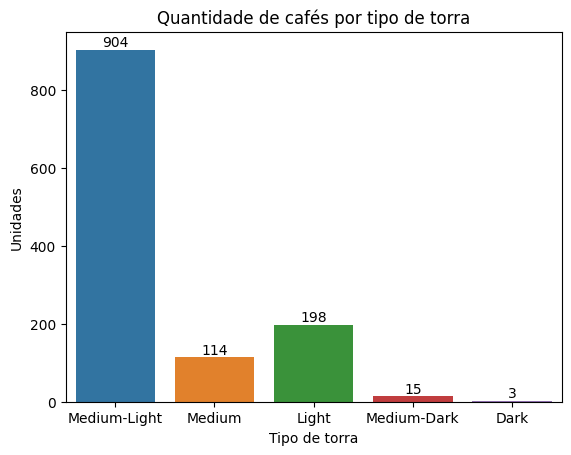

In [11]:
ax = sns.countplot(data=data, x='roast')
ax.bar_label(ax.containers[0])
plt.title("Quantidade de cafés por tipo de torra")
plt.ylabel("Unidades")
plt.xlabel("Tipo de torra")

In [12]:
medium_light = (data['roast'] == "Medium-Light").sum()
others =  (data['roast']).count()
percentage_medium_light = (medium_light / others) * 100
percentage_medium_light

73.257698541329

Pode-se perceber que a torra mais produzida é a torra medium-light, com 1490 cafés, correspondendo a 71,6% do tipo de torra produzido.  

Text(0.5, 0, 'Nota')

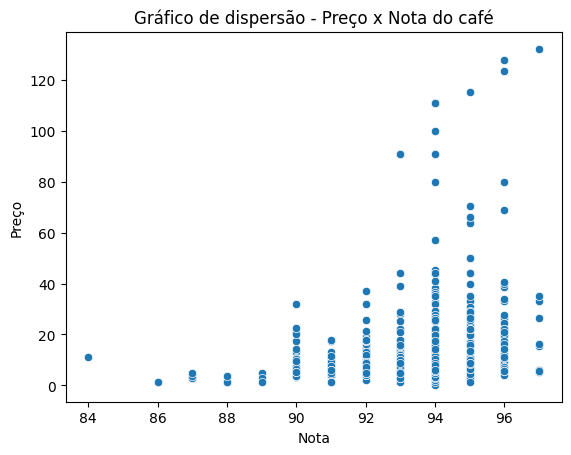

In [13]:
sns.scatterplot(data=data, x='rating', y='100g_USD')
plt.title("Gráfico de dispersão - Preço x Nota do café")
plt.ylabel("Preço")
plt.xlabel("Nota")

Aparentemente, a nota não influencia de maneira significativa no preço. A maioria dos café aparentam estar abaixo de 50 dólares (100g).

Text(0, 0.5, 'Local da venda')

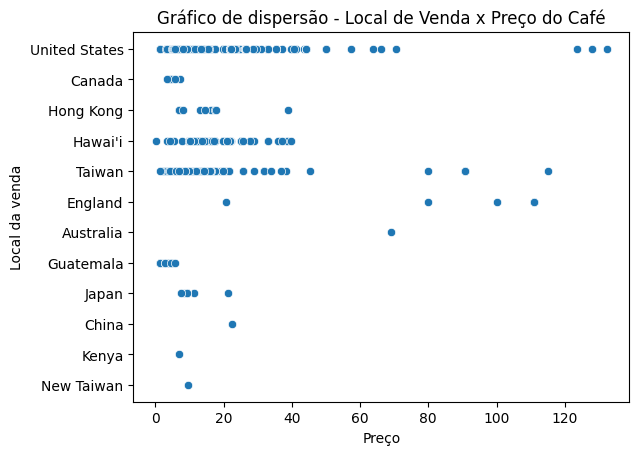

In [14]:
sns.scatterplot(data=data, y='loc_country', x='100g_USD')
plt.title("Gráfico de dispersão - Local de Venda x Preço do Café")
plt.xlabel("Preço")
plt.ylabel("Local da venda")

Esse gráfico já pode sugerir que o preço pode estar relacionado com o local da venda, uma vez que os grãos mais caros estão em países mais desenvolvidos e não produtores de café (Taiwan, Estados Unidos, Inglaterra)

Dessa forma, o próximo passo é determinar onde estão os cafés mais caros. Nesse momento, vamos definir como caro os cafés acimas de 40 dálores/100g. Lembrando que da nossa análise inicial temos que 75% dos cafés tem preço menor ou igual a USD 8.785.

In [15]:
expansive_coffee = data[data['100g_USD'] >= 40]
expansive_coffee.describe()

,100g_USD,rating
count,31.000000,31.000000
mean,78.425484,94.516129
std,29.813477,1.060533
min,40.560000,93.000000
25%,47.640000,94.000000
50%,80.000000,94.000000
75%,105.555000,95.000000
max,132.280000,97.000000


Vamos repetir as análises feitas:
* Qual é o tipo de torra dos cafés mais caro?
* O preço está associado com a nota dos cafés mais caros?
* Onde são vendidos os cafés mais caros?

Text(0.5, 0, 'Tipo de torra')

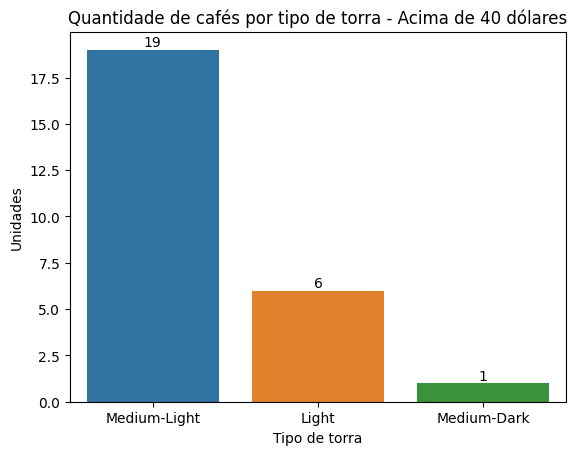

In [16]:
ax = sns.countplot(data=expansive_coffee, x='roast')
ax.bar_label(ax.containers[0])
plt.title("Quantidade de cafés por tipo de torra - Acima de 40 dólares")
plt.ylabel("Unidades")
plt.xlabel("Tipo de torra")

Descobrimos que entre os cafés mais caros, nem a torra Medium nem a torra Dark estão presentes, o que pode sugerir que os cafés mais medianos/leves são preferidos.

In [17]:
medium_light = (expansive_coffee['roast'] == "Medium-Light").sum()
others =  (expansive_coffee['roast']).count()
percentage_medium_light = (medium_light / others) * 100
percentage_medium_light

73.07692307692307

Text(0, 0.5, 'Local da venda')

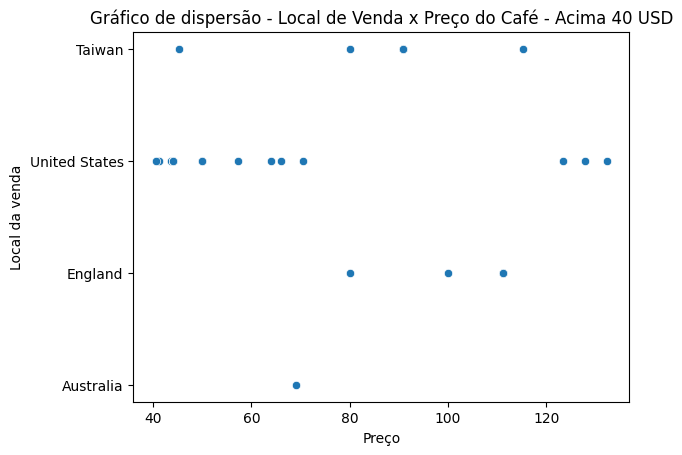

In [18]:
sns.scatterplot(data=expansive_coffee, y='loc_country', x='100g_USD')
plt.title("Gráfico de dispersão - Local de Venda x Preço do Café - Acima 40 USD")
plt.xlabel("Preço")
plt.ylabel("Local da venda")

### Agora, vamos ver quantos países produtores distintos a base possui e em quantos países esses vendedores estão localizados. Depois vamos repetir as analises para os cafés mais caros.

In [19]:
paises_produtores_1 = data['origin'].unique()
paises_vendedores = data['loc_country'].unique()
print(f'Existem {len(paises_produtores_1)} países produtores')
print(f'Existem {len(paises_vendedores)} países que vendem esses cafés')


Existem 27 países produtores
Existem 12 países que vendem esses cafés


<Axes: xlabel='origin'>

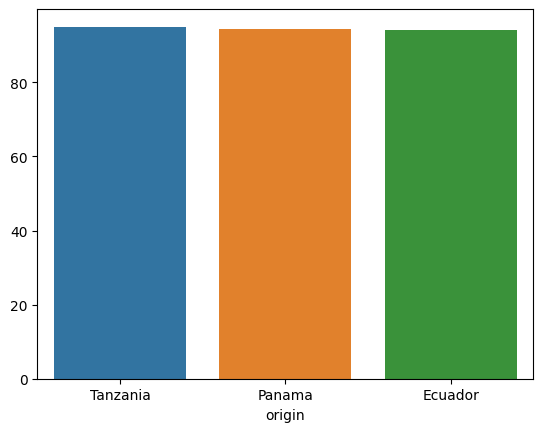

In [21]:
media_notas = data.groupby('origin')['rating'].mean()
top_5_paises = media_notas.nlargest(3)
sns.barplot(x=top_5_paises.index, y=top_5_paises.values)


In [22]:
paises_produtores_1 = expansive_coffee['origin'].unique()
paises_vendedores = expansive_coffee['loc_country'].unique()
print('Entre os cafés mais caros temos: ')
print(f'Existem {len(paises_produtores_1)} lugares produtores principais')
print(f'Existem {len(paises_vendedores)} países que vendem esses cafés')

Entre os cafés mais caros temos: 
Existem 8 lugares produtores principais
Existem 4 países que vendem esses cafés


<Axes: xlabel='origin'>

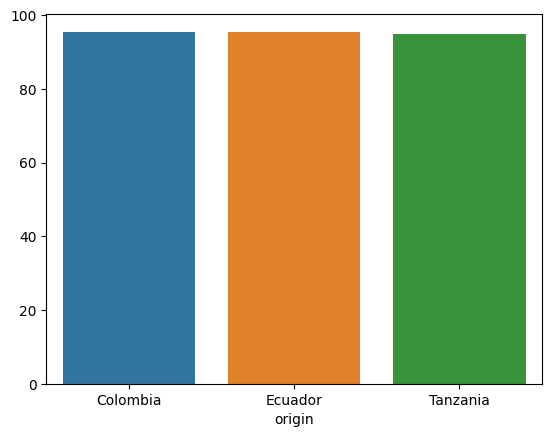

In [24]:
media_notas = expansive_coffee.groupby('origin')['rating'].mean()
top_5_paises = media_notas.nlargest(3)
sns.barplot(x=top_5_paises.index, y=top_5_paises.values)

Podemos repetir essa análise, considerando as maiores notas. Das 2095 avaliações, vamos analisar as 5% maiores notas.

In [26]:
0.05*1246

62.300000000000004

In [27]:
bigger_scores = data.nlargest(62, 'rating')
bigger_scores.describe()

,100g_USD,rating
count,62.000000,62.000000
mean,23.633548,96.032258
std,27.911290,0.542240
min,3.890000,95.000000
25%,6.230000,96.000000
50%,16.160000,96.000000
75%,26.460000,96.000000
max,132.280000,97.000000


É interessante perceber que entre as maiores notas, 75% dos cafés possuem valor menor ou igual a 26,46 USD, o que mostra que as maiores notas não são, necessariamente, dos cafés mais caros.  
Vamos observar a torra dos cafés de maior nota:

Text(0.5, 0, 'Tipo de torra')

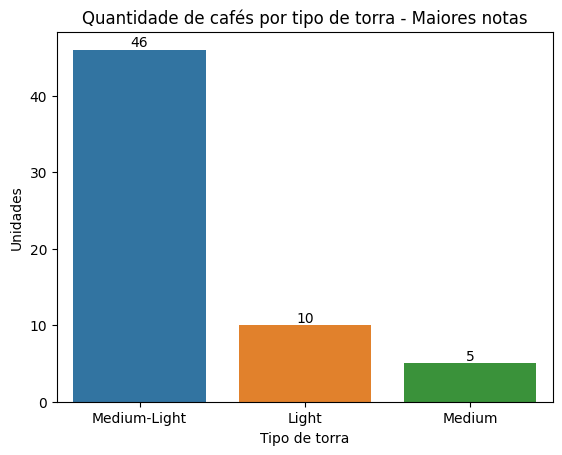

In [28]:
ax = sns.countplot(data=bigger_scores, x='roast')
ax.bar_label(ax.containers[0])
plt.title("Quantidade de cafés por tipo de torra - Maiores notas")
plt.ylabel("Unidades")
plt.xlabel("Tipo de torra")

Podemos ver que, diferente do preço, nas maiores notas temos cafés de todos os tipos de torra, com predominancia da torra medium-light.  
Por fim, vamos olhar os países dos melhores cafés:

## 3. Insights